### The Goal of Experimental Design

The purpose of a formal experiment is to move from informal observations to robust, quantifiable conclusions about cause and effect. It provides an objective and controlled way to test a specific hypothesis. Instead of a vague statement like "X probably affected Y," a well-designed experiment combined with statistical analysis allows for a precise conclusion, such as:

> "The evidence indicates that X had a statistically significant effect on Y, with a 5% risk of a Type I error (a false positive)."

This level of rigor is essential in fields ranging from medical research and product analytics to marketing and government policy.

#### Core Terminology

  * **Subjects**: The entities on which the experiment is performed (e.g., users, patients, employees, plots of land).
  * **Treatment Group**: The group of subjects that receives the specific change or intervention being tested.
  * **Control Group**: The group of subjects that does not receive the treatment. This group serves as a baseline for comparison, showing what would have happened without the intervention.

### The Critical Role of Random Assignment

The validity of an experiment's conclusion rests almost entirely on how subjects are assigned to the treatment and control groups. The goal is to create two groups that are as similar as possible in every respect *before* the treatment is applied.

#### The Flaw of Non-random Assignment

A common but incorrect approach is to assign subjects non-randomly, for example, by splitting a list of users in half. This method is highly susceptible to **selection bias**. If there is any underlying order in the data (e.g., users are sorted by their sign-up date or activity level), the two groups will be systematically different from the start. Any observed difference in the outcome could be due to this pre-existing difference, not the treatment, making the experiment's results invalid.

```python
import pandas as pd
import numpy as np

# Create a generic dataset of 200 subjects, sorted by a baseline metric
# This simulates a non-random ordering
np.random.seed(42)
subjects = pd.DataFrame({
    'id': np.arange(200),
    'baseline_metric': np.sort(np.random.normal(loc=100, scale=10, size=200))
})

# Non-random assignment by slicing the DataFrame
group1_nonrandom = subjects.iloc[0:100]
group2_nonrandom = subjects.iloc[100:]

# Compare the baseline metric for the two groups
print("Group 1 Mean:", group1_nonrandom['baseline_metric'].mean())
print("Group 2 Mean:", group2_nonrandom['baseline_metric'].mean())
```

The means are significantly different *before* any treatment is applied. An experiment conducted on these groups would be fundamentally flawed.

#### The Solution: Random Assignment

**Random assignment** is the cornerstone of experimental design. By randomly assigning each subject to either the treatment or control group, we ensure that, on average, any pre-existing characteristics (both known and unknown) are distributed equally between the two groups. This isolates the treatment as the only systematic difference, allowing us to confidently attribute any observed change in the outcome to the treatment itself.

In pandas, this can be achieved using the `.sample()` method.

```python
# Random assignment using .sample() 
# Randomly select 50% of subjects for Group 1
group1_random = subjects.sample(frac=0.5, random_state=42)
# The remaining subjects go into Group 2
group2_random = subjects.drop(group1_random.index)

# Compare the baseline metric for the two randomly assigned groups
print("Group 1 Mean:", group1_random['baseline_metric'].mean())
print("Group 2 Mean:", group2_random['baseline_metric'].mean())
```

With random assignment, the baseline means of the two groups are now nearly identical. This creates a fair and unbiased starting point for the experiment, ensuring that any significant difference observed after the treatment can be attributed to the treatment itself.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/weights.csv"
weights = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))

In [4]:
# Select the first 250 rows for group 1 (non-random assignment)
group1_non_rand = weights.iloc[0:250]

# Select the remaining rows for group 2 (non-random assignment)
group2_non_rand = weights.iloc[250:]

# Concatenate descriptive statistics of both groups for comparison
compare_df_non_rand = pd.concat(
    [group1_non_rand["weight"].describe(), group2_non_rand["weight"].describe()], axis=1
)

display(compare_df_non_rand)

,weight,weight
count,250.000000,250.000000
mean,58.821560,71.287480
std,4.503791,5.019958
min,39.070000,65.100000
25%,56.200000,67.490000
50%,59.390000,70.115000
75%,62.527500,73.770000
max,65.100000,95.820000


In [5]:
# Randomly sample 50% of the data without replacement for group 1
group1_random = weights.sample(frac=0.5, random_state=42, replace=False)

# Assign the remaining data to group 2 by dropping group 1 indices
group2_random = weights.drop(group1_random.index)

# Combine descriptive statistics of both groups into a single DataFrame for comparison
compare_df_random = pd.concat(
    [group1_random["weight"].describe(), group2_random["weight"].describe()], axis=1
)

# Rename columns to reflect group names for clarity
compare_df_random.columns = ["group1", "group2"]

display(compare_df_random)

,group1,group2
count,250.000000,250.000000
mean,64.499960,65.609080
std,8.073025,7.596346
min,39.070000,44.040000
25%,58.660000,60.312500
50%,64.620000,65.540000
75%,69.957500,70.442500
max,86.760000,95.820000


While simple randomization is the foundation of experimental design, it can sometimes result in imbalances between groups by pure chance. Advanced techniques like **block randomization** ensure equal group sizes, while **stratified randomization** ensures that key baseline characteristics (**covariates**) are evenly distributed between the treatment and control groups, which helps to isolate the treatment's true effect.

## The Limitations of Simple Randomization

Simple random assignment is a powerful tool, but it is not without potential issues, especially in smaller experiments:

1.  **Uneven Group Sizes**: When using a method like `df.sample(frac=0.5)`, random chance might lead to slightly different numbers of subjects in the treatment and control groups.
2.  **Covariate Imbalance**: A more critical issue is the potential for an imbalance in **covariates**. A covariate is a baseline variable (like age, location, or user status) that could also influence the outcome of the experiment. If, by chance, one group ends up with a higher proportion of a key covariate, this can become a **confounding variable**, making it difficult to distinguish between the effect of the treatment and the effect of the pre-existing group imbalance.

### Advanced Randomization Techniques

To mitigate these issues, more sophisticated randomization techniques are often employed.

#### Block Randomization

**Block randomization** is a procedure used to ensure that the number of subjects in the treatment and control groups remains equal or very close throughout the subject recruitment process.

  * **Purpose**: To prevent imbalances in group sizes.
  * **How it works**: Subjects are divided into "blocks" of a pre-determined size (e.g., blocks of 4). Within each block, a random half of the subjects are assigned to the treatment group and the other half to the control group. This process is repeated for each new block of subjects.

#### Stratified Randomization

**Stratified randomization** is a technique used to control for potential confounding variables by ensuring that key baseline characteristics are perfectly balanced across the experimental groups.

  * **Purpose**: To eliminate the influence of important covariates.
  * **How it works**:
    1.  First, the population is divided into subgroups, or **strata**, based on the covariate(s) of interest (e.g., one stratum for "power users" and another for "not power users").
    2.  Then, within **each stratum**, a separate simple randomization is performed to assign subjects to the treatment and control groups.

This two-step process guarantees that the proportion of subjects with that characteristic (e.g., the percentage of power users) is identical in both the treatment and control groups.

#### A Complete Example: Simple vs. Stratified Randomization

Let's demonstrate the value of stratified randomization with a complete example.

**Scenario**: We want to test a new website feature (the treatment) to see if it increases `basket_size`. We know that `power_user` status is a strong predictor of `basket_size`, making it a potential confounding variable.

```python
import pandas as pd
import numpy as np

# 1. Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'user_id': np.arange(1000),
    'power_user': np.random.choice([0, 1], 1000, p=[0.9, 0.1])
})

# 2. Simple Random Assignment 
# Assign 50% to Treatment ('T') and 50% to Control ('C')
group_T_simple = df.sample(frac=0.5, random_state=42)
group_C_simple = df.drop(group_T_simple.index)
# Check the distribution of the 'power_user' covariate
print("Control Group:\n", group_C_simple['power_user'].value_counts(normalize=True))
print("Treatment Group:\n", group_T_simple['power_user'].value_counts(normalize=True))
# Note: The proportions are close, but not identical, due to random chance.

# 3. Stratified Random Assignment 
# Stratum 1: Not Power Users (power_user == 0)
strata_0 = df[df['power_user'] == 0]
strata_0_T = strata_0.sample(frac=0.5, random_state=42)
strata_0_C = strata_0.drop(strata_0_T.index)

# Stratum 2: Power Users (power_user == 1)
strata_1 = df[df['power_user'] == 1]
strata_1_T = strata_1.sample(frac=0.5, random_state=42)
strata_1_C = strata_1.drop(strata_1_T.index)

# Combine the stratified groups
group_T_stratified = pd.concat([strata_0_T, strata_1_T])
group_C_stratified = pd.concat([strata_0_C, strata_1_C])

# Check the distribution of the 'power_user' covariate again
print("Control Group:\n", group_C_stratified['power_user'].value_counts(normalize=True))
print("Treatment Group:\n", group_T_stratified['power_user'].value_counts(normalize=True))
```

The output demonstrates that with simple randomization, the proportion of power users in the two groups is slightly different due to random chance. With **stratified randomization**, the proportion of power users is **exactly identical** in both the treatment and control groups. This removes the `power_user` status as a potential confounding variable, ensuring that any difference we observe in `basket_size` between the groups can be more confidently attributed to the treatment itself.

In [6]:
# Generate random basket sizes between 0 and 1000 for 1000 users
basket_size = np.random.randint(low=0, high=1001, size=1000)

# Generate base web time (2 to 30 seconds) for all users
base_time = np.random.randint(low=2, high=30, size=1000)

# Calculate the effect of basket size on web time (each $ adds ~0.08 seconds)
size_effect = basket_size * 0.08

# Add random noise (mean=0, std=15) to simulate variability in user behavior
noise = np.random.normal(0, 15, 1000)

# Combine base time, size effect, and noise to compute total web time
web_time = base_time + size_effect + noise

# Clip web time to ensure it stays within realistic bounds (2 to 120 seconds)
web_time = np.clip(web_time, 2, 120).astype(int)

# Create a DataFrame to store basket size and web time
ecom = pd.DataFrame(data={"basket_size": basket_size, "web_time": web_time})

# Mark users as power users (1) if their web time exceeds 40 seconds, else 0
ecom["power_user"] = (ecom["web_time"] > 40).astype(int)

In [7]:
# Randomly sample 50% of the data for group 1, ensuring reproducibility with random_state
group1 = ecom.sample(frac=0.5, random_state=42, replace=False)

# Assign group 1 to Block 1 for stratified analysis
group1["Block"] = 1

# Assign the remaining data to group 2 by dropping group 1 indices
group2 = ecom.drop(group1.index)

# Assign group 2 to Block 2 for stratified analysis
group2["Block"] = 2

print(len(group1), len(group2))

500 500


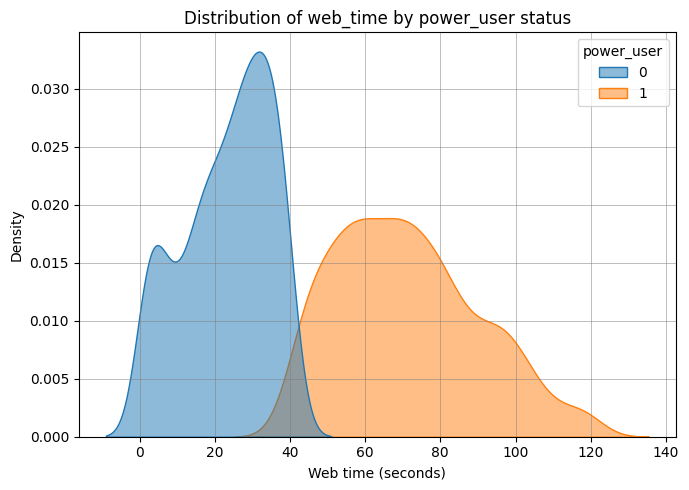

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))

# Plot KDEs of web_time for each power_user group (0 vs 1)
sns.kdeplot(
    data=ecom,
    x="web_time",
    hue="power_user",
    fill=True,
    common_norm=False,
    alpha=0.5,
    ax=ax,
)

ax.set(
    xlabel="Web time (seconds)",
    ylabel="Density",
    title="Distribution of web_time by power_user status",
)
ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()
plt.show()

In [9]:
# Filter rows where 'power_user' equals 1 and create a copy to avoid SettingWithCopyWarning
strata_1 = ecom.loc[ecom["power_user"] == 1].copy()

# Assign Block 1 to all rows in the filtered DataFrame
strata_1["Block"] = 1

# Randomly sample 50% of the rows for the treatment group (T), ensuring reproducibility
strata_1_g1 = strata_1.sample(frac=0.5, replace=False, random_state=42).copy()
strata_1_g1["T_C"] = "T"  # Mark sampled rows as treatment group

# Assign the remaining rows to the control group (C) by dropping treatment indices
strata_1_g2 = strata_1.drop(strata_1_g1.index).copy()
strata_1_g2["T_C"] = "C"  # Mark remaining rows as control group

In [10]:
# Filter out rows from 'ecom' DataFrame where 'power_user' equals 1 to create strata_2
strata_2 = ecom.drop(strata_1.index)

# Assign Block 2 to all rows in the filtered DataFrame for stratified analysis
strata_2["Block"] = 2

# Randomly sample 50% of the rows for the treatment group (T), ensuring reproducibility
strata_2_g1 = strata_2.sample(frac=0.5, replace=False, random_state=42).copy()

# Mark sampled rows as treatment group
strata_2_g1["T_C"] = "T"

# Assign the remaining rows to the control group (C) by dropping treatment indices
strata_2_g2 = strata_2.drop(strata_2_g1.index).copy()

# Mark remaining rows as control group
strata_2_g2["T_C"] = "C"

In [11]:
# Combine all stratified groups into a single DataFrame for analysis
ecom_stratified = pd.concat([strata_1_g1, strata_1_g2, strata_2_g1, strata_2_g2])

# Group by Block, Treatment/Control (T_C), and power_user, then count occurrences
# This provides a summary of the distribution of users across strata and groups
display(ecom_stratified.groupby(["Block", "T_C", "power_user"]).size())

Block  T_C  power_user
1      C    1             341
       T    1             342
2      C    0             159
       T    0             158
dtype: int64

In [12]:
url = "https://raw.githubusercontent.com/jhlopesalves/data-science-practice-notebook/refs/heads/main/Python/statistics/experimental_design/data/productivity_subjects.csv"
productivity_subjects = pd.read_csv(
    url, usecols=lambda col: not col.startswith("Unnamed")
)
productivity_subjects.head()

,subject_id
0,1
1,2
2,3
3,4
4,5


### Blocking experimental data
You are working with a manufacturing firm that wants to conduct some experiments on worker productivity. Their dataset only contains 100 rows, so it's important that experimental groups are balanced.

This sounds like a great opportunity to use your knowledge of blocking to assist them. They have provided a `productivity_subjects` DataFrame. Split the provided dataset into two even groups of 50 entries each.

In [13]:
block_1 = productivity_subjects.sample(frac=0.5, random_state=42, replace=False)
block_1["block"] = 1

block_2 = productivity_subjects.drop(block_1.index)
block_2["block"] = 2
productivity_combined = pd.concat([block_1, block_2], axis=0)
display(productivity_combined["block"].value_counts())

block
1    50
2    50
Name: count, dtype: int64